Title

In [1]:
#Importing necessary libraries
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns

# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading Dataset
days_data = pd.read_csv('day.csv')

In [3]:
days_data.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        1           1   
1        2  02-01-2018       1   0     1        0        2           1   
2        3  03-01-2018       1   0     1        0        3           1   
3        4  04-01-2018       1   0     1        0        4           1   
4        5  05-01-2018       1   0     1        0        5           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [4]:
days_data.shape

(730, 16)

In [5]:
#Checking for data_types of variables and null values if they exist
days_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
days_data.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.995890   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.000339   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.690411    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.462641    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

Visualizing Data


In [7]:
days_data.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        1           1   
1        2  02-01-2018       1   0     1        0        2           1   
2        3  03-01-2018       1   0     1        0        3           1   
3        4  04-01-2018       1   0     1        0        4           1   
4        5  05-01-2018       1   0     1        0        5           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [8]:
#Converting Data to Readable format for analysis

days_data.season.value_counts()


season
3    188
2    184
1    180
4    178
Name: count, dtype: int64

In [9]:
# Converting Season from numeric encoding to String Format
days_data['season'] = days_data['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [10]:
# Converting Year from numeric encoding to String Format
days_data.yr = days_data.yr.map({0:2018, 1:2019})

In [11]:
# Converting Holiday from numeric encoding to String Format
days_data.holiday = days_data.holiday.map({0:'Holiday_No', 1:'Holiday_Yes'})

In [12]:
# Converting weekday from numeric encoding to String Format
days_data.weekday = days_data.weekday.map({0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'})

In [13]:
# NWH -> No weekend or holiday, WH -> Weekwnd or Holiday
days_data.workingday = days_data.workingday.map({1:'NWH',0:'WH'})

In [14]:
# Converting weathersit from numeric encoding to String Format
days_data.weathersit = days_data.weathersit.map({1:'Clear', 2:'Misty', 3:'Snowfall', 4:'Heavy Rain'})

- Visualizing Individual numeric variable distributions

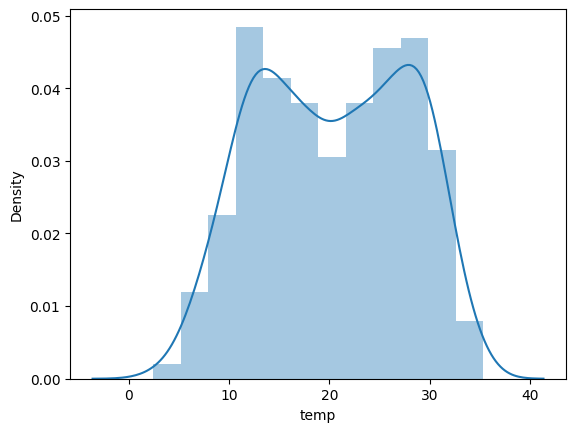

In [15]:
# Visulaizing temperature variable
sns.distplot(days_data.temp)
plt.show()

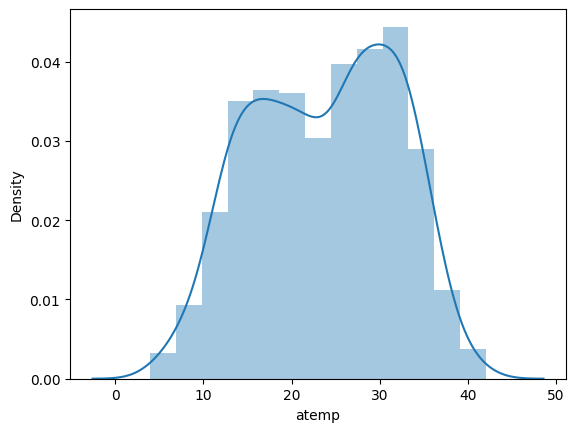

In [16]:
#Visulaizing atemp variable
sns.distplot(days_data.atemp)
plt.show()

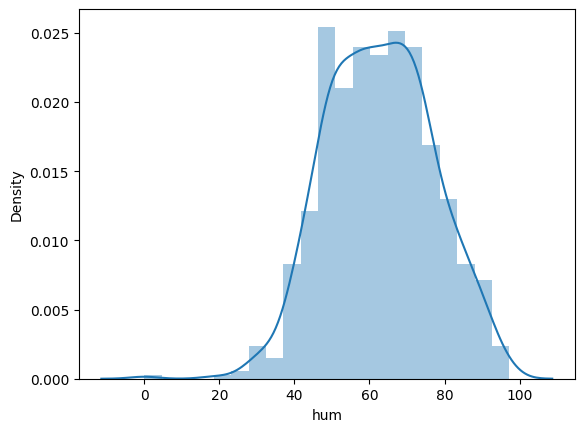

In [17]:
#Visulaizing humidity variable
sns.distplot(days_data.hum)
plt.show()

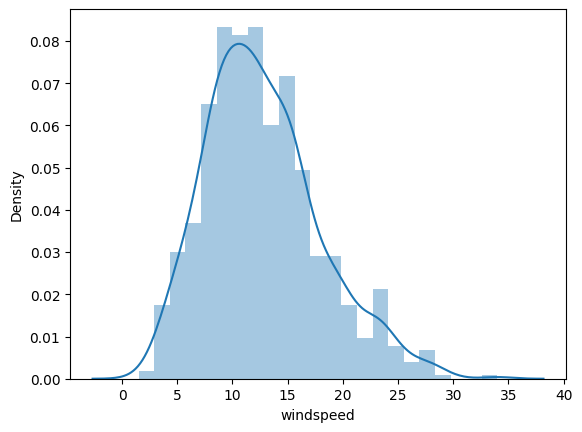

In [18]:
#Visulaizing humidity variable
sns.distplot(days_data.windspeed)
plt.show()

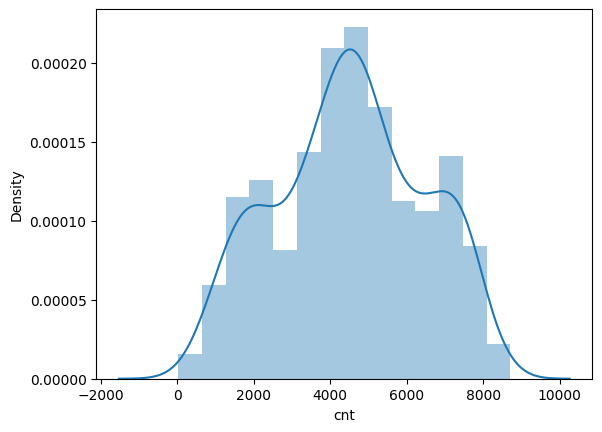

In [19]:
#Visualizing Count variable
sns.distplot(days_data.cnt)
plt.show()

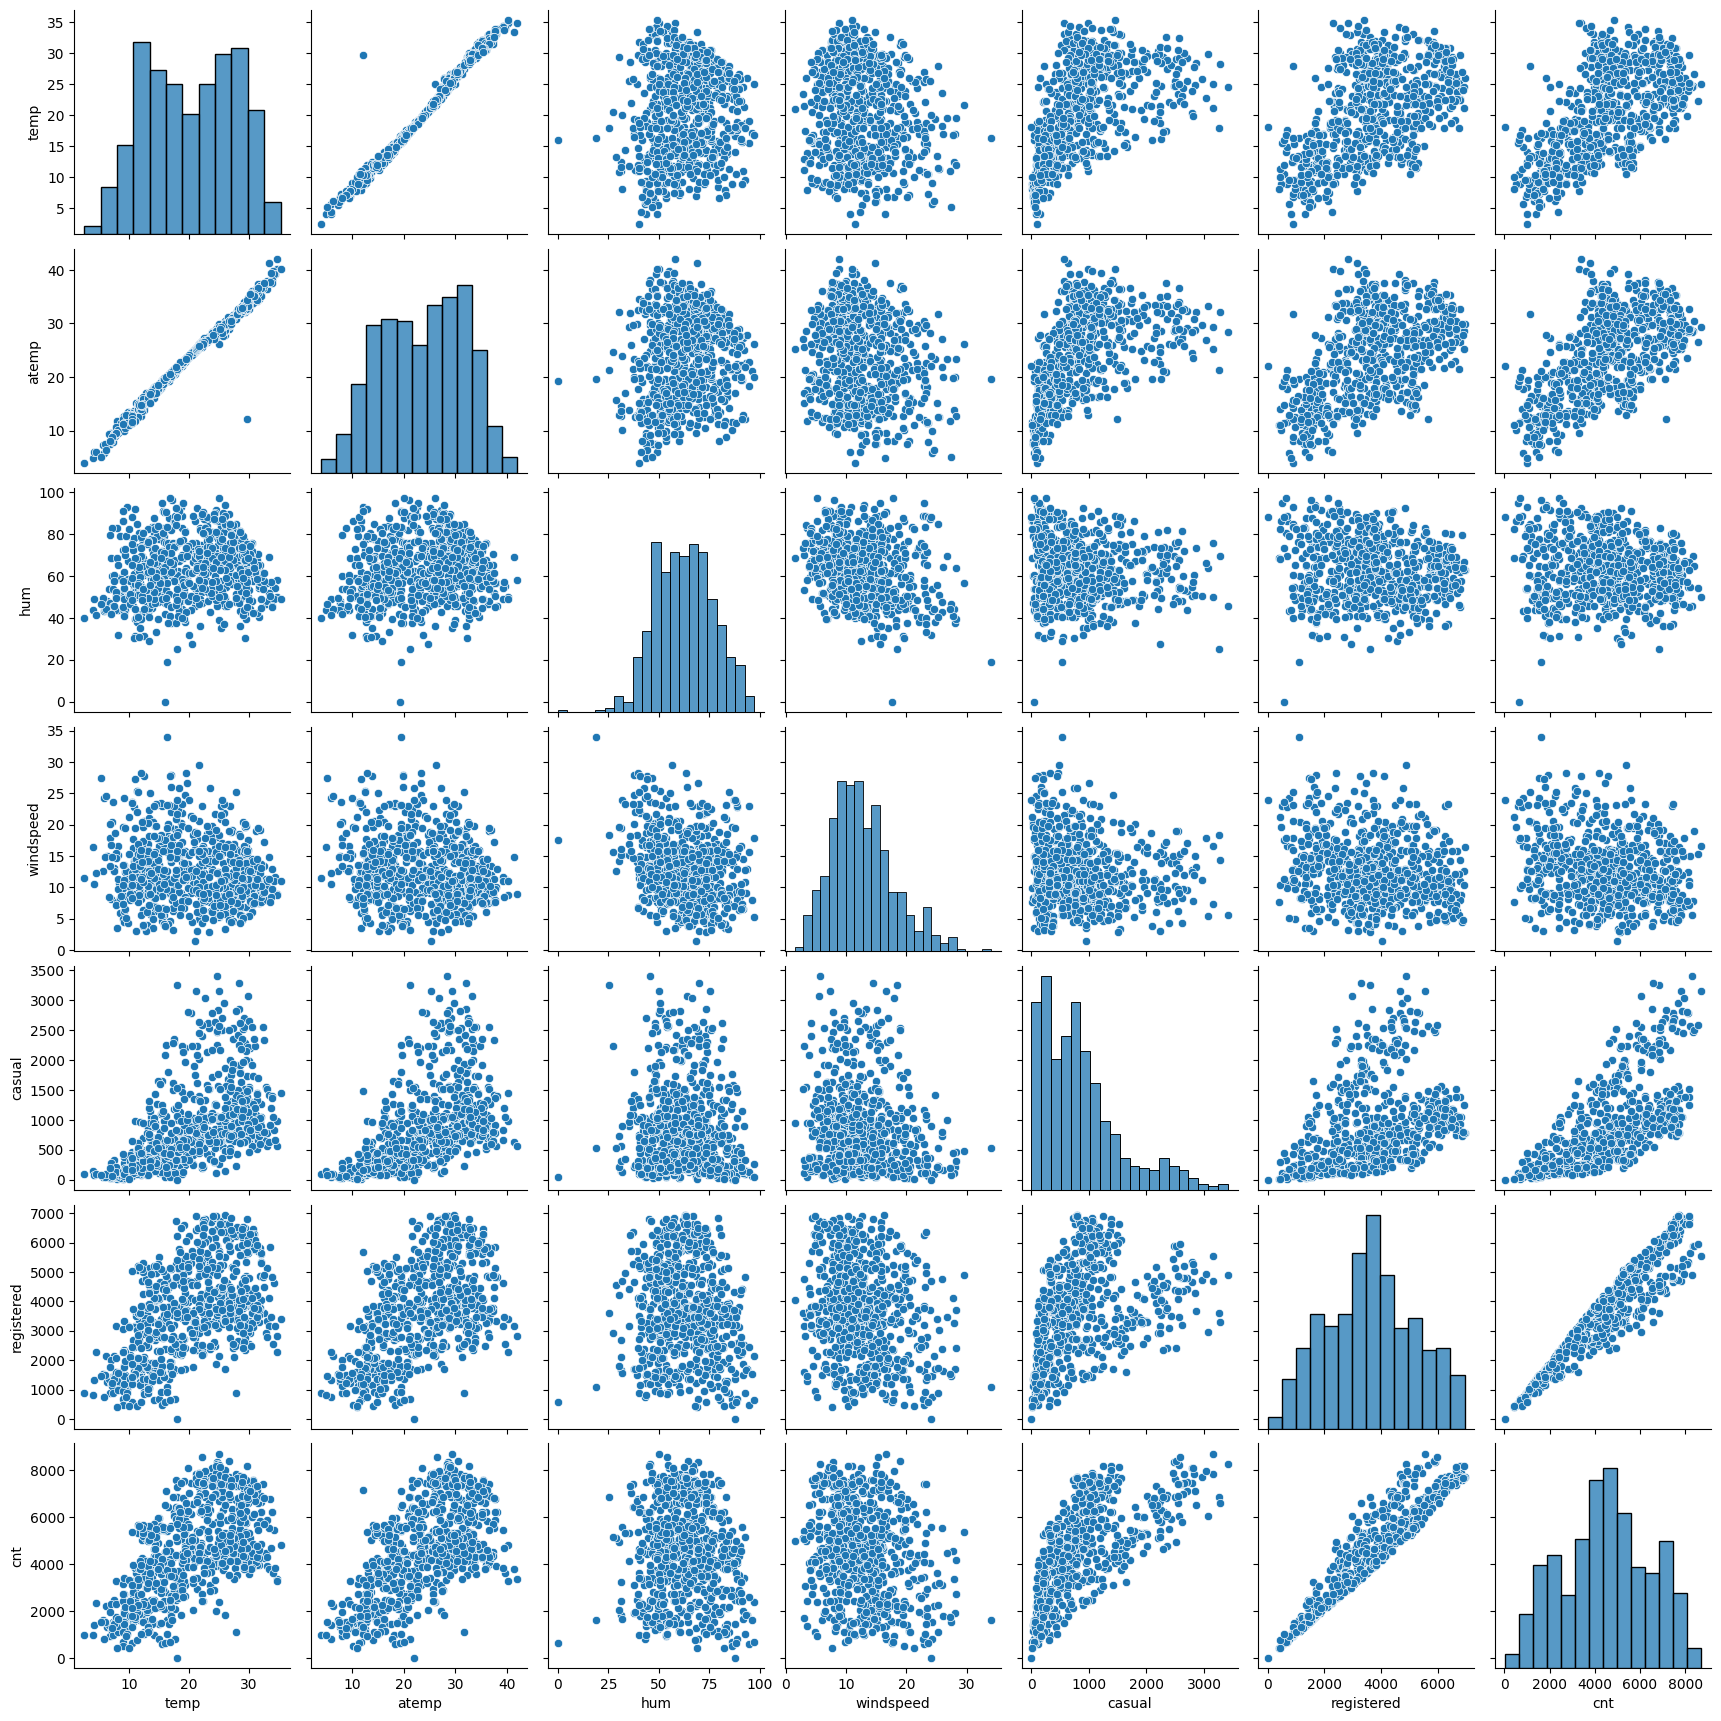

In [20]:
#Plotting pairplot of numeric variables to understand direct correlation between them
sns.pairplot(data=days_data.loc[:,'temp':])
plt.show()

In [21]:
#Converting dteday column in datetime
days_data['dteday']= pd.to_datetime(days_data['dteday'], format=r'%d-%m-%Y')

In [22]:
days_data['dteday'].dtype

dtype('<M8[ns]')

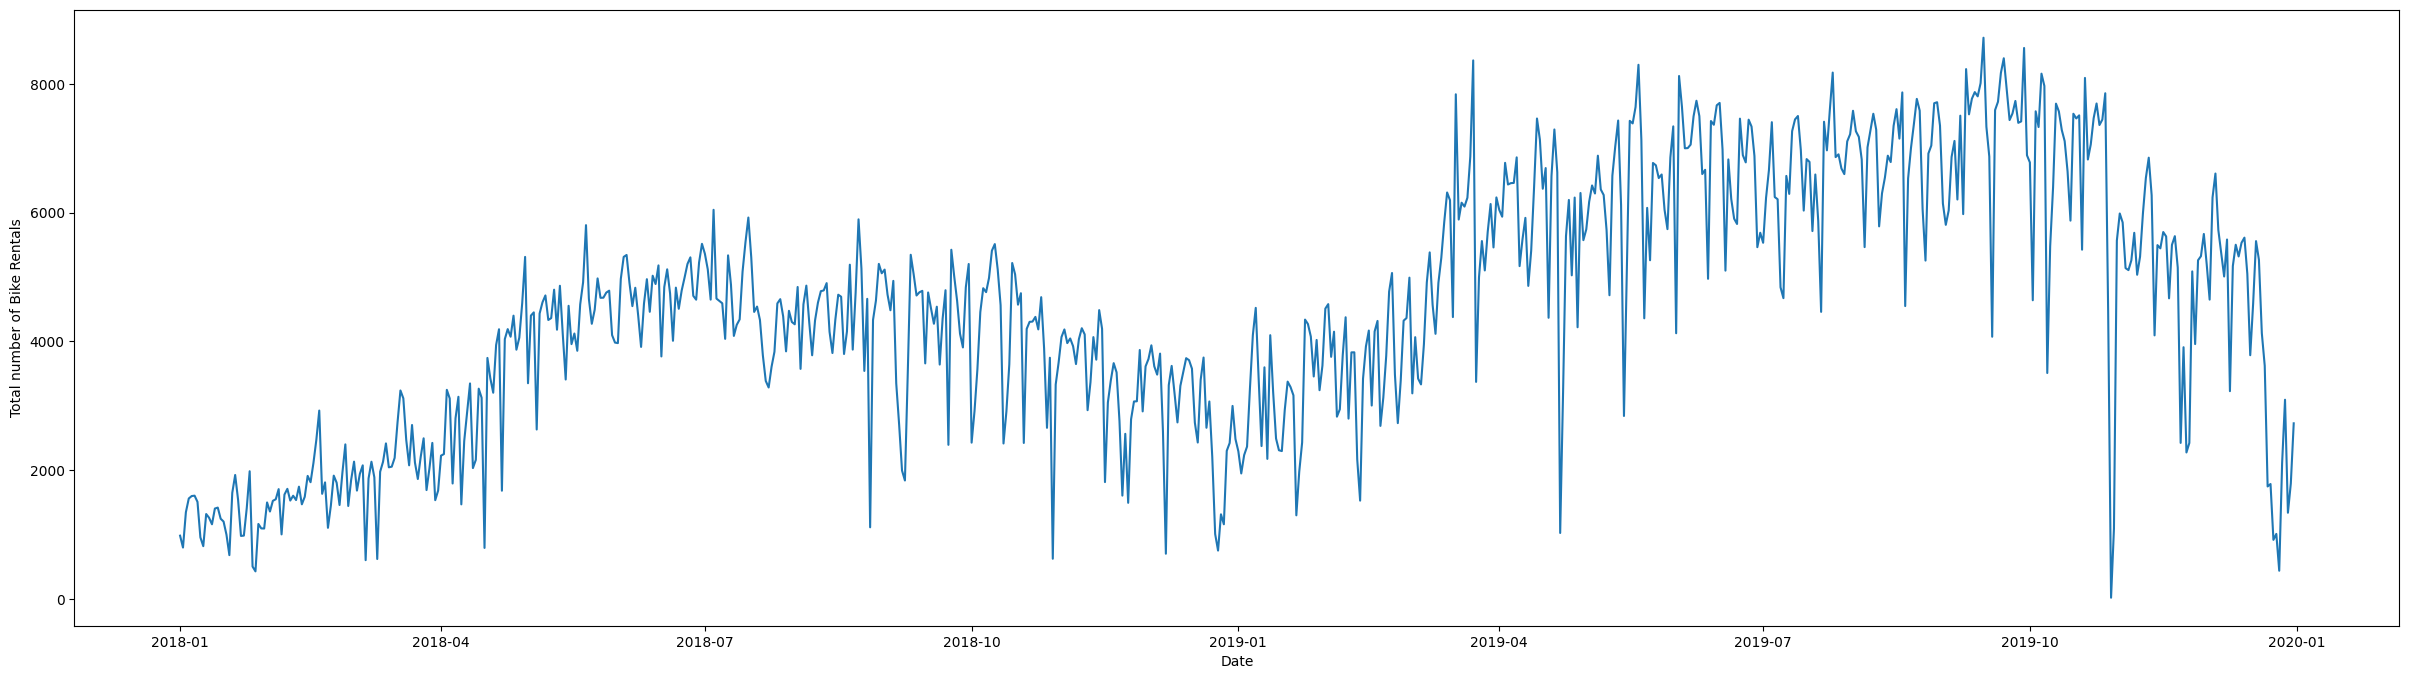

In [23]:
figure = plt.figure(figsize=[30,8])
plt.xlabel('Date')
plt.ylabel('Total number of Bike Rentals')
sns.lineplot(data=days_data, x='dteday', y='cnt')
plt.show()

- Number of Bike Rentals seems to have started a bit low at start in Jan 2018, and by time it has seen increase in mid months of 2018. 
- We see a greater high of Bike rentals in year 2019 due to more visibility by time.
- Number has again seen a great decline in last two months of 2019 due to arrival of Covid Pandemic.

In [24]:
days_data.groupby(['season'])['cnt'].mean().plot.bar(color=['Green', 'Yellow', 'Red', 'Blue'])
plt.xlabel('Seasons')
plt.ylabel('Average Bike Rentals')
plt.show()

- Most of Bike Rentals are seen in Fall/Autumns followed by summer, maybe due to people prefer travelling in scenaries or most working days are in these seasons.

- Spring has the lowest since people enjoy holidays in springs and prefer less travelling, Winter being lying somewhere in middle.

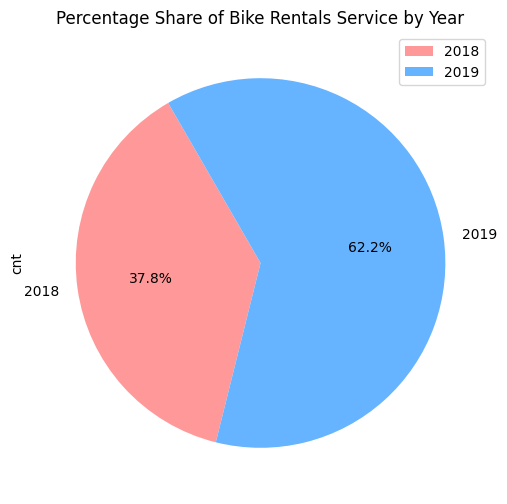

In [25]:
# Service Count by Year
days_data.groupby(['yr'])['cnt'].mean().plot.pie(autopct='%1.1f%%', figsize=(8, 6), colors=['#ff9999', '#66b3ff'], startangle=120, legend=True)
plt.title('Percentage Share of Bike Rentals Service by Year')
plt.show()


- 2019 has definitely more Count of Service compared to 2018

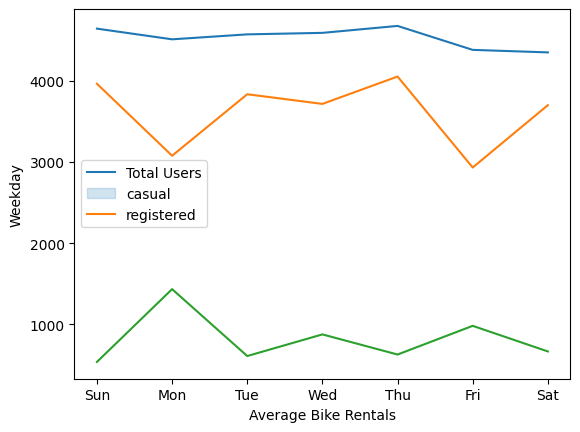

In [26]:
sns.lineplot(days_data.groupby(['weekday'])['cnt'].median())
sns.lineplot(days_data.groupby(['weekday'])['registered'].median())
sns.lineplot(days_data.groupby(['weekday'])['casual'].median())
plt.ylabel('Weekday')
plt.xlabel('Average Bike Rentals')
plt.xticks(ticks=range(0, 7), labels=['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
plt.legend(['Total Users', 'casual', 'registered'])
plt.show()

- Overall people prefer travelling more in weekdays

- Registered users seem to travel more on weekdays as they maybe using service for their work purpose which decreases on weekends.

- On the contrary Casual users tend to use service more on weekends as they may use it more for trips/picnics.

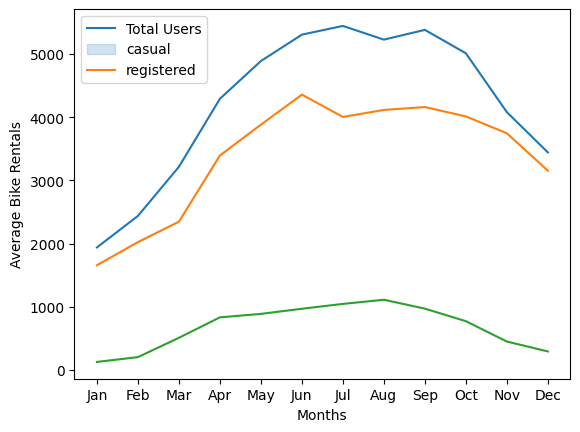

In [27]:
sns.lineplot(days_data.groupby(['mnth'])['cnt'].median())
sns.lineplot(days_data.groupby(['mnth'])['registered'].median())
sns.lineplot(days_data.groupby(['mnth'])['casual'].median())
plt.xlabel('Months')
plt.ylabel('Average Bike Rentals')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(['Total Users', 'casual', 'registered'])
plt.show()

- Months April to October has the maximum average of Bike rentals.

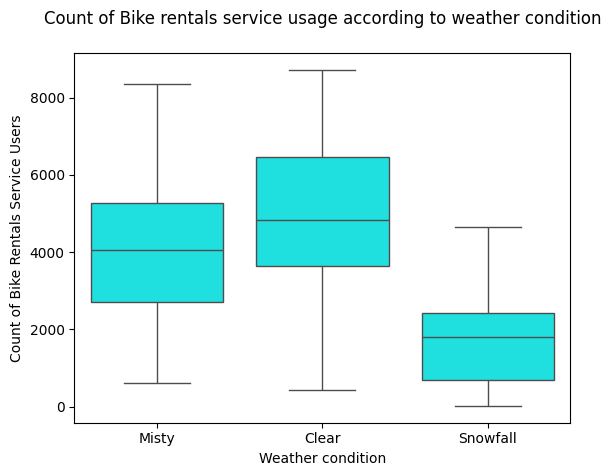

In [28]:
sns.boxplot(data=days_data, x='weathersit', y='cnt', color='Cyan')
plt.title('Count of Bike rentals service usage according to weather condition\n')
plt.ylabel("Count of Bike Rentals Service Users")
plt.xlabel('Weather condition')
plt.show()

- Median Bike rentals are more when the weather is relatively clear

In [29]:
days_data.head()

instant     dteday  season    yr  mnth     holiday weekday workingday  \
0        1 2018-01-01  spring  2018     1  Holiday_No     Mon        NWH   
1        2 2018-01-02  spring  2018     1  Holiday_No     Tue        NWH   
2        3 2018-01-03  spring  2018     1  Holiday_No     Wed        NWH   
3        4 2018-01-04  spring  2018     1  Holiday_No     Thu        NWH   
4        5 2018-01-05  spring  2018     1  Holiday_No     Fri        NWH   

  weathersit       temp     atemp      hum  windspeed  casual  registered  \
0      Misty  14.110847  18.18125  80.5833  10.749882     331         654   
1      Misty  14.902598  17.68695  69.6087  16.652113     131         670   
2      Clear   8.050924   9.47025  43.7273  16.636703     120        1229   
3      Clear   8.200000  10.60610  59.0435  10.739832     108        1454   
4      Clear   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

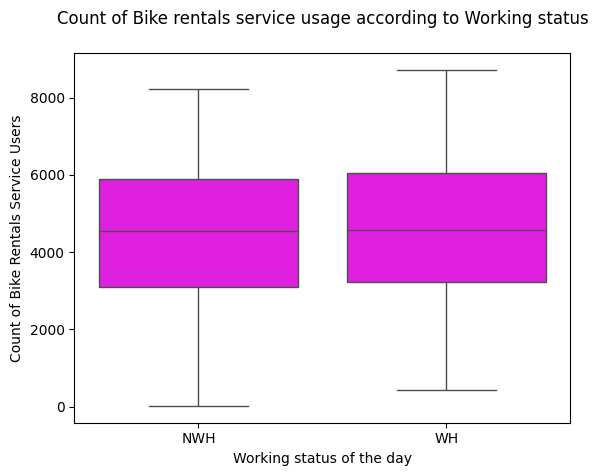

In [30]:
#Visualizing difference of Service count on Working and Non-Working Days
sns.boxplot(data=days_data, x='workingday', y='cnt', color='Magenta')
plt.title('Count of Bike rentals service usage according to Working status\n')
plt.ylabel("Count of Bike Rentals Service Users")
plt.xlabel('Working status of the day')
plt.show()

There is a slight difference in high, low and mid's of Count of Bike Rentals in Working days compared to non-working days.

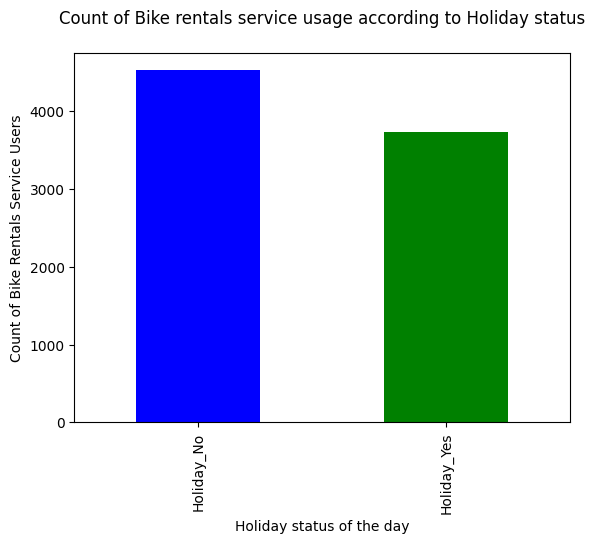

In [31]:
days_data.groupby(['holiday'])['cnt'].mean().plot.bar(color=['Blue', 'Green'])
plt.title('Count of Bike rentals service usage according to Holiday status\n')
plt.ylabel("Count of Bike Rentals Service Users")
plt.xlabel('Holiday status of the day')
plt.show()

People are using Bike rental service more in non-holiday days

In [32]:
#Dropping Unnecessary variables, dropping instant and dteday variables as they are of no use

days_data.drop(['instant', 'dteday', 'casual', 'registered'], inplace=True, axis=1) 

Building 1st Model

- #We will no more alter original dataframe and hence create copy dataframes where we can alter variables for model building

In [33]:
#Preparing dataframe for Creating First Model

modeldf_1 = days_data.copy()

In [34]:
modeldf_1.head()

season    yr  mnth     holiday weekday workingday weathersit       temp  \
0  spring  2018     1  Holiday_No     Mon        NWH      Misty  14.110847   
1  spring  2018     1  Holiday_No     Tue        NWH      Misty  14.902598   
2  spring  2018     1  Holiday_No     Wed        NWH      Clear   8.050924   
3  spring  2018     1  Holiday_No     Thu        NWH      Clear   8.200000   
4  spring  2018     1  Holiday_No     Fri        NWH      Clear   9.305237   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600

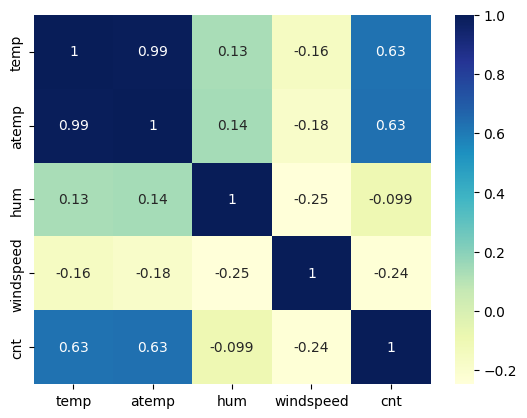

In [35]:
# Checking Co-relation between numerical variables
#plt.figure(figsize = (16, 10))
sns.heatmap(modeldf_1.iloc[:, 7:].corr(), annot = True, cmap="YlGnBu")
plt.show()

The heatmap shows some useful insights:

Correlation of Count('cnt') with independent variables:
- Count('cnt') is highly (positively) correlated with both 'temp' and 'atemp'.

- Count is negatively correlated to 'windspeed' (-0.24). This gives us an impression that the shared bikes demand will be somewhat less on windy days as compared to normal days.

Correlation among independent variables:
- Some of the independent variables are highly correlated: atemp and temp are highly (positively) correlated. The correlation between the two is almost equal to 1.


Thus, while building the model, we'll have to pay attention to multicollinearity.

In [36]:
#For this model I am considering atemp variable as I think this variable has more effect on how people will respond to surroundings and service 
# ultimately also the correlation between temp and cnt, atemp and cnt is same i.e 0.63.

# So I will drop temp variable

modeldf_1.drop('temp', axis=1, inplace=True)



In [37]:
#Catagorical Columns

Catagorical_columns =['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

In [38]:
#Next we have to Dummyfy the catagorical columns for building model
modeldf_1 = pd.get_dummies(modeldf_1, columns=Catagorical_columns, drop_first=True, dtype=int)

In [39]:
modeldf_1.head()

atemp      hum  windspeed   cnt  season_spring  season_summer  \
0  18.18125  80.5833  10.749882   985              1              0   
1  17.68695  69.6087  16.652113   801              1              0   
2   9.47025  43.7273  16.636703  1349              1              0   
3  10.60610  59.0435  10.739832  1562              1              0   
4  11.46350  43.6957  12.522300  1600              1              0   

   season_winter  yr_2019  mnth_2  mnth_3  ...  holiday_Holiday_Yes  \
0              0        0       0       0  ...                    0   
1              0        0       0       0  ...                    0   
2              0        0       0       0  ...                    0   
3              0        0       0       0  ...                    0   
4              0        0       0       0  ...                    0   

   weekday_Mon  weekday_Sat  weekday_Sun  weekday_Thu  weekday_Tue  \
0            1            0            0            0            0   
1            0            0            0            0            1   
2            0            0            0            0            0   
3            0            0            0            1            0   
4            0            0            0            0            0   

   weekday_Wed  workingday_WH  weathersit_Misty  weathersit_Snowfall  
0            0              0                 1                    0  
1            0              0                 1                    0  
2            1              0                 0                    0  
3            0              0                 0                    0  
4            0              0                 0                    0  

[5 rows x 29 columns]

In [40]:
modeldf_1.columns

Index(['atemp', 'hum', 'windspeed', 'cnt', 'season_spring', 'season_summer',
       'season_winter', 'yr_2019', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5',
       'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12',
       'holiday_Holiday_Yes', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun',
       'weekday_Thu', 'weekday_Tue', 'weekday_Wed', 'workingday_WH',
       'weathersit_Misty', 'weathersit_Snowfall'],
      dtype='object')

- Now we will split our dataset into train and test for building model

In [41]:
#Importing essential libraries and packages for model building
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

model1_train, model1_test = train_test_split(modeldf_1, train_size=0.8, test_size=0.2, random_state=100)

In [42]:
#Checking number of rows in train and test
model1_train.shape, model1_test.shape

((584, 29), (146, 29))

In [43]:
model1_train.head()

atemp      hum  windspeed   cnt  season_spring  season_summer  \
367   6.31375  44.1250  24.499957  2236              1              0   
648  21.55835  46.3333  12.166932  7570              0              0   
44   19.91750  37.5833  27.999836  1913              1              0   
705  16.09790  76.4167   8.750200  5008              0              0   
379   8.08125  41.9167  16.834286  2311              1              0   

     season_winter  yr_2019  mnth_2  mnth_3  ...  holiday_Holiday_Yes  \
367              0        1       0       0  ...                    0   
648              1        1       0       0  ...                    0   
44               0        0       1       0  ...                    0   
705              1        1       0       0  ...                    0   
379              0        1       0       0  ...                    0   

     weekday_Mon  weekday_Sat  weekday_Sun  weekday_Thu  weekday_Tue  \
367            0            0            0            1            0   
648            0            0            0            0            0   
44             0            0            0            0            0   
705            0            1            0            0            0   
379            0            0            0            0            1   

     weekday_Wed  workingday_WH  weathersit_Misty  weathersit_Snowfall  
367            0              0                 0                    0  
648            0              0                 0                    0  
44             1              0                 0                    0  
705            0              1                 1                    0  
379            0              0                 0                    0  

[5 rows x 29 columns]

In [44]:
model1_test.columns

Index(['atemp', 'hum', 'windspeed', 'cnt', 'season_spring', 'season_summer',
       'season_winter', 'yr_2019', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5',
       'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12',
       'holiday_Holiday_Yes', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun',
       'weekday_Thu', 'weekday_Tue', 'weekday_Wed', 'workingday_WH',
       'weathersit_Misty', 'weathersit_Snowfall'],
      dtype='object')

- As we can see above excluding numeric variables i.e ['atemp', 'hum', 'windspeed', 'cnt'] all other variables are having values either 0 or 1.
- It is Important that all the variables have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. 
- This might become very annoying at the time of model evaluation.

- Hence we will be using Min-Max scaler to scale the numeric variables here

In [45]:
# Initializing Minmaxscaler
scaler = MinMaxScaler()

In [46]:
# Sclaing catagorical features in training dataset
num_vars = ['atemp', 'hum', 'windspeed', 'cnt']
model1_train[num_vars] = scaler.fit_transform(model1_train[num_vars])

In [47]:
model1_train.head()

atemp       hum  windspeed       cnt  season_spring  season_summer  \
367  0.061963  0.454701   0.695175  0.254717              1              0   
648  0.462175  0.477458   0.299450  0.868385              0              0   
44   0.419099  0.387290   0.807474  0.217556              1              0   
705  0.318824  0.787463   0.189819  0.573631              0              0   
379  0.108365  0.431945   0.449210  0.263346              1              0   

     season_winter  yr_2019  mnth_2  mnth_3  ...  holiday_Holiday_Yes  \
367              0        1       0       0  ...                    0   
648              1        1       0       0  ...                    0   
44               0        0       1       0  ...                    0   
705              1        1       0       0  ...                    0   
379              0        1       0       0  ...                    0   

     weekday_Mon  weekday_Sat  weekday_Sun  weekday_Thu  weekday_Tue  \
367            0            0            0            1            0   
648            0            0            0            0            0   
44             0            0            0            0            0   
705            0            1            0            0            0   
379            0            0            0            0            1   

     weekday_Wed  workingday_WH  weathersit_Misty  weathersit_Snowfall  
367            0              0                 0                    0  
648            0              0                 0                    0  
44             1              0                 0                    0  
705            0              1                 1                    0  
379            0              0                 0                    0  

[5 rows x 29 columns]

In [48]:
#Checking the scales of values in all columns
model1_train.describe()

atemp         hum   windspeed         cnt  season_spring  \
count  584.000000  584.000000  584.000000  584.000000     584.000000   
mean     0.513175    0.649499    0.319463    0.515792       0.251712   
std      0.211663    0.144219    0.168114    0.225336       0.434369   
min      0.000000    0.000000    0.000000    0.000000       0.000000   
25%      0.331819    0.535852    0.199177    0.350696       0.000000   
50%      0.530558    0.653714    0.294764    0.522837       0.000000   
75%      0.690521    0.752361    0.410413    0.691872       1.000000   
max      1.000000    1.000000    1.000000    1.000000       1.000000   

       season_summer  season_winter     yr_2019      mnth_2      mnth_3  ...  \
count     584.000000     584.000000  584.000000  584.000000  584.000000  ...   
mean        0.246575       0.250000    0.513699    0.073630    0.090753  ...   
std         0.431387       0.433384    0.500241    0.261392    0.287504  ...   
min         0.000000       0.000000    0.000000    0.000000    0.000000  ...   
25%         0.000000       0.000000    0.000000    0.000000    0.000000  ...   
50%         0.000000       0.000000    1.000000    0.000000    0.000000  ...   
75%         0.000000       0.250000    1.000000    0.000000    0.000000  ...   
max         1.000000       1.000000    1.000000    1.000000    1.000000  ...   

       holiday_Holiday_Yes  weekday_Mon  weekday_Sat  weekday_Sun  \
count           584.000000   584.000000   584.000000   584.000000   
mean              0.027397     0.155822     0.119863     0.130137   
std               0.163378     0.362997     0.325080     0.336743   
min               0.000000     0.000000     0.000000     0.000000   
25%               0.000000     0.000000     0.000000     0.000000   
50%               0.000000     0.000000     0.000000     0.000000   
75%               0.000000     0.000000     0.000000     0.000000   
max               1.000000     1.000000     1.000000     1.000000   

       weekday_Thu  weekday_Tue  weekday_Wed  workingday_WH  weathersit_Misty  \
count   584.000000   584.000000   584.000000     584.000000        584.000000   
mean      0.145548     0.159247     0.136986       0.273973          0.342466   
std       0.352955     0.366220     0.344128       0.446377          0.474941   
min       0.000000     0.000000     0.000000       0.000000          0.000000   
25%       0.000000     0.000000     0.000000       0.000000          0.000000   
50%       0.000000     0.000000     0.000000       0.000000          0.000000   
75%       0.000000     0.000000     0.000000       1.000000          1.000000   
max       1.000000     1.000000     1.000000       1.000000          1.000000   

       weathersit_Snowfall  
count           584.000000  
mean              0.027397  
std               0.163378  
min               0.000000  
25%               0.000000  
50%               0.000000  
75%               0.000000  
max               1.000000  

[8 rows x 29 columns]

- As we can see now every variable have a min and max of 0 and 1 respectively. Hence now they are on same scale.

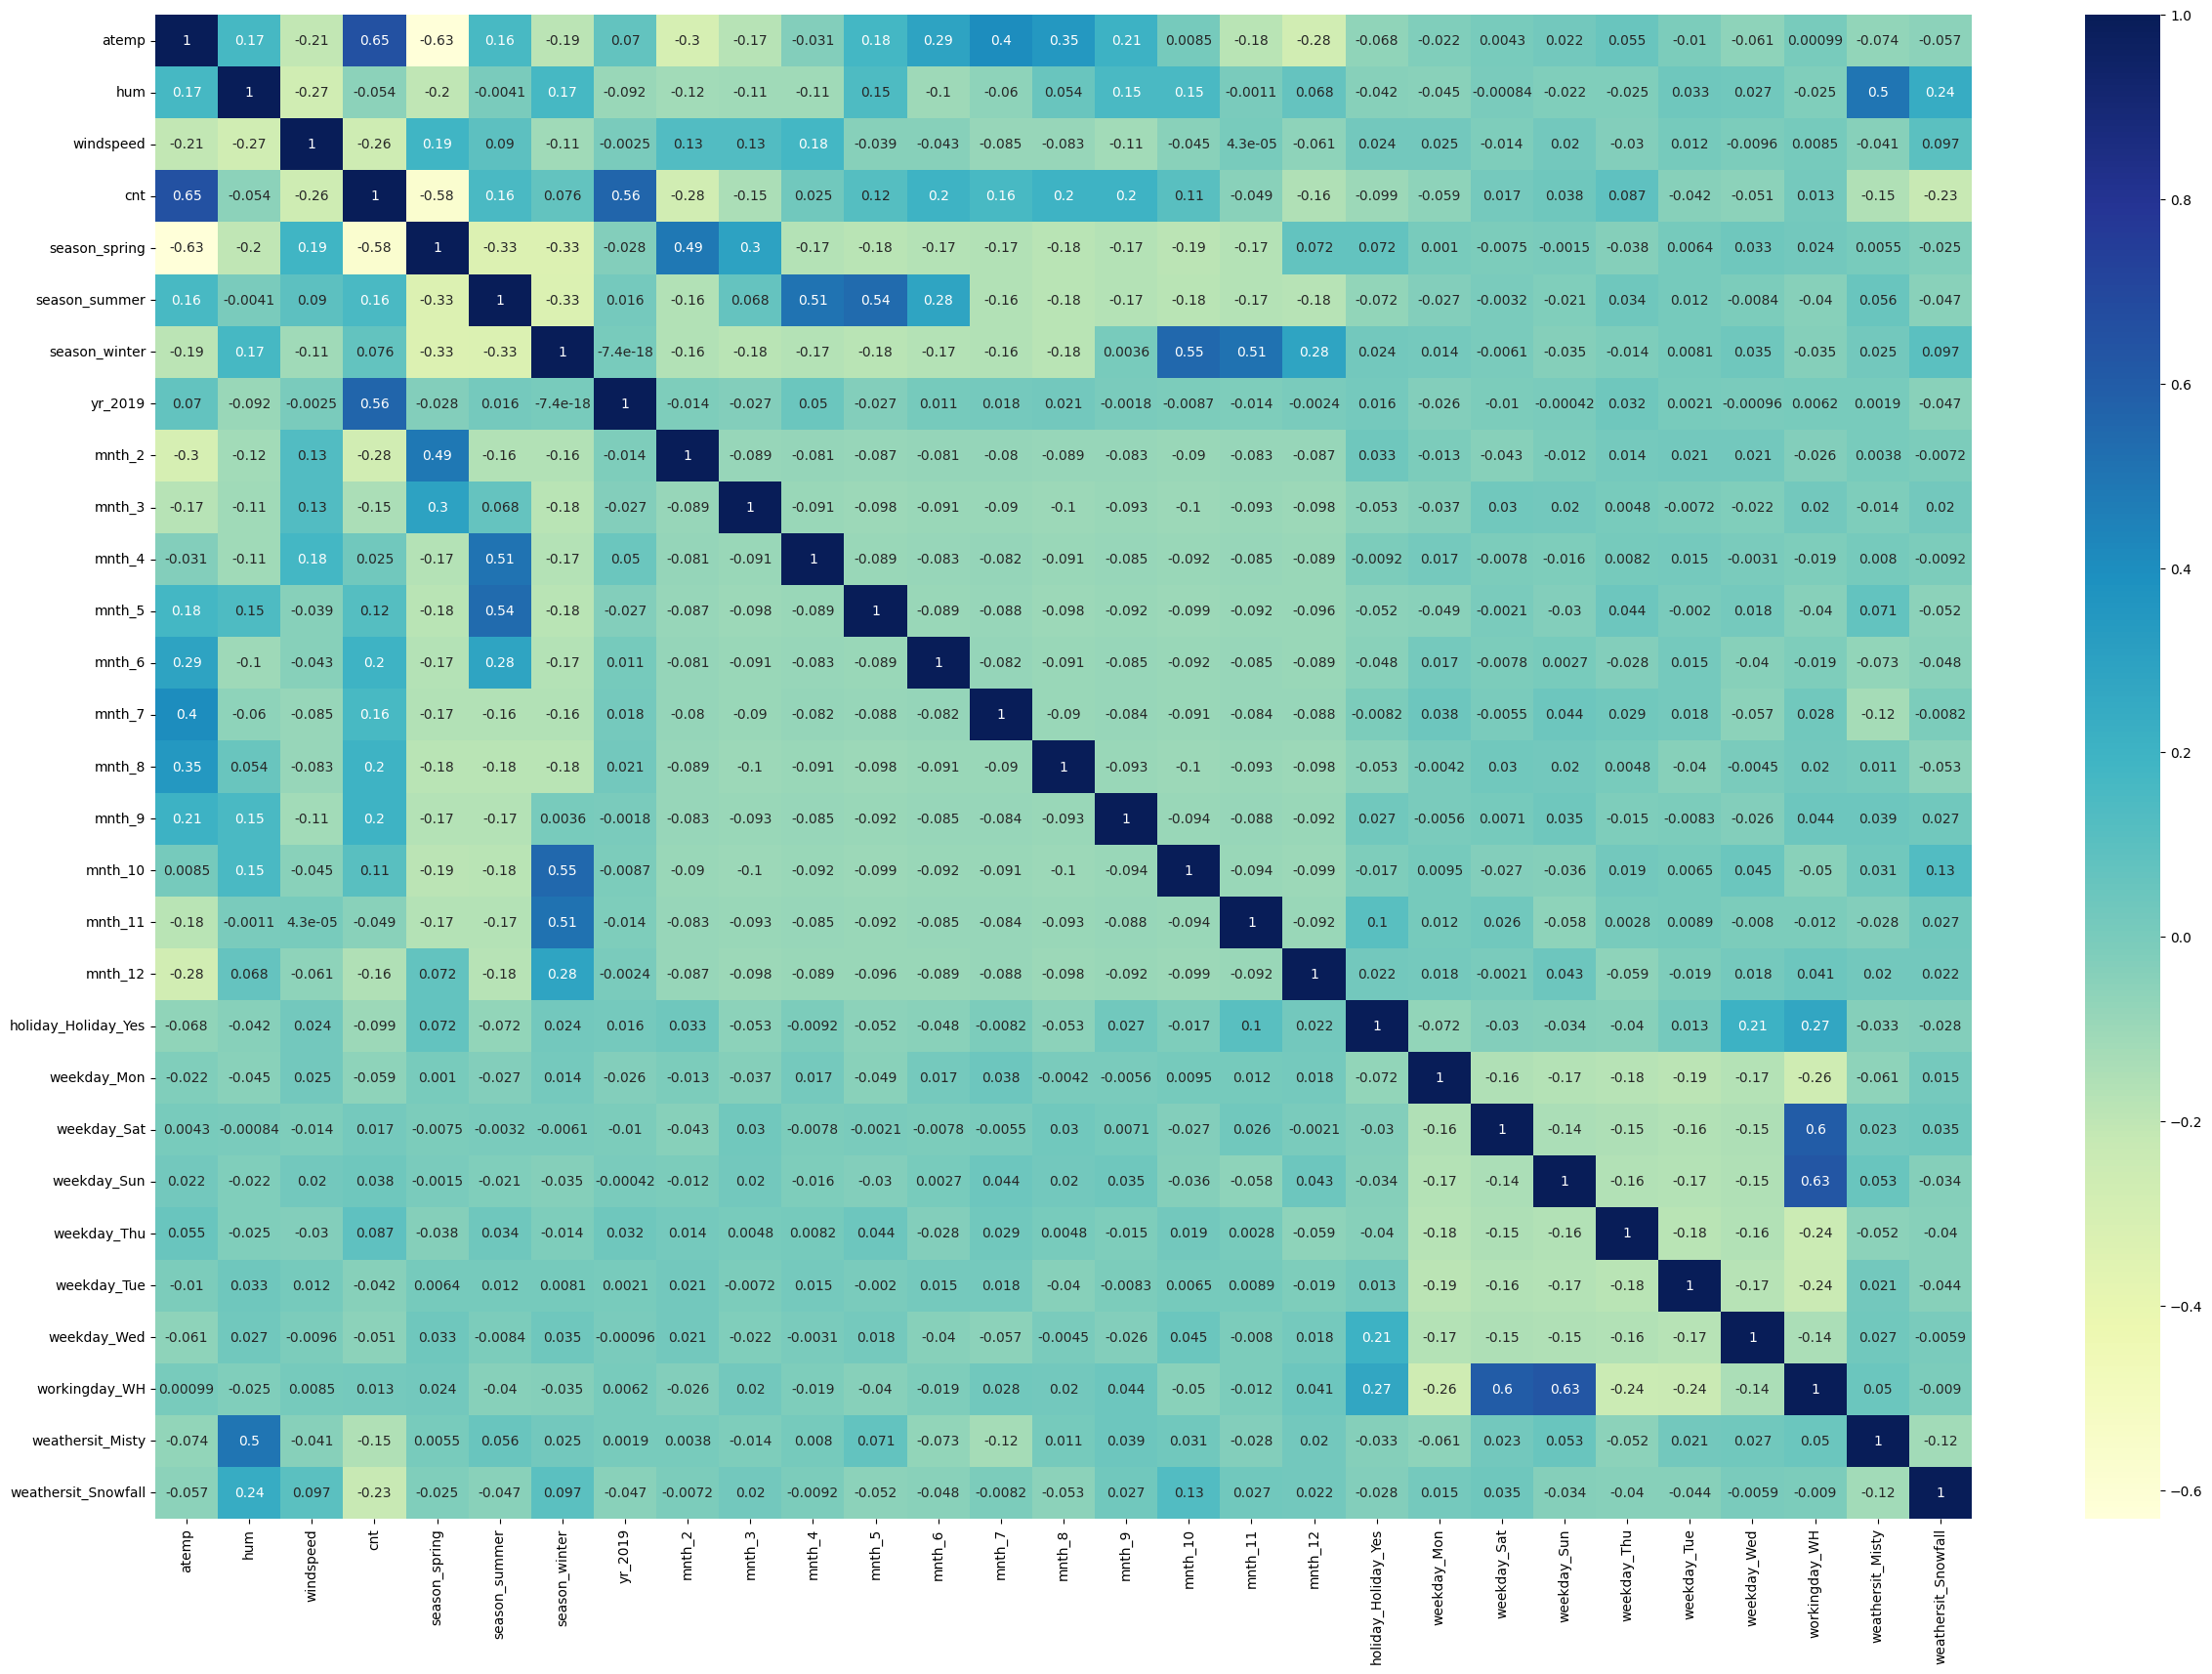

In [49]:
# Now again we will check correlation coefficients to see which variables are highly correlated
figure = plt.figure(figsize=[30, 20])
sns.heatmap(model1_train.corr(), annot=True, cmap='YlGnBu')
plt.show()

In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
#Putting feature variables into X

X = model1_train.drop(['cnt'], axis=1)
y = model1_train[['cnt']]

In [52]:
X.shape, y.shape

((584, 28), (584, 1))

In [53]:
#Defining Regression
reg = LinearRegression()

In [54]:
#Fitting model on train data

reg.fit(X,y)

LinearRegression()

In [55]:
#Checking the constant, Coeficient and regression accuracy

print("Constant beta0:", reg.intercept_[0])
print("\nRegression Coefficients beta1's:\n", reg.coef_)
print("\nRegression Accuracy on Train dataset in percentage:", np.round(reg.score(X, y)*100, 2))

Constant beta0: 0.2824688867216605

Regression Coefficients beta1's:
 [[ 4.22785533e-01 -1.46963209e-01 -1.59170621e-01 -6.32355673e-02
   3.40105799e-02  1.03949986e-01  2.29897706e-01  3.02956963e-02
   6.92117165e-02  6.72828635e-02  9.76443936e-02  9.68822059e-02
   5.20517305e-02  1.06390230e-01  1.56049117e-01  8.11946593e-02
   1.23723199e-02  9.55656222e-03 -1.30467849e-01 -3.28822766e-02
  -4.62734035e-02 -4.30022598e-02 -4.97889739e-05 -2.99728001e-02
  -1.29051872e-02  5.22761278e-02 -5.84205430e-02 -2.54818348e-01]]

Regression Accuracy on Train dataset in percentage: 85.27


- Our model seems to have 85% accuracy which is decent one but, we can further improve it by removing unimportant features and further optimizing it

In [56]:
# Importing Recursive Feature elimination from sklearn.feature_selection
from sklearn.feature_selection import RFE

In [57]:
# Initializing and fitting the train dataset in RFE
rfe = RFE(estimator=reg, n_features_to_select=16)
rfe = rfe.fit(X,y)

In [58]:
# Checking columns chosen by RFE
list(zip(X.columns, rfe.support_, rfe.ranking_))

[('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 2),
 ('season_winter', True, 1),
 ('yr_2019', True, 1),
 ('mnth_2', False, 4),
 ('mnth_3', True, 1),
 ('mnth_4', True, 1),
 ('mnth_5', True, 1),
 ('mnth_6', True, 1),
 ('mnth_7', False, 3),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 11),
 ('mnth_12', False, 12),
 ('holiday_Holiday_Yes', True, 1),
 ('weekday_Mon', False, 8),
 ('weekday_Sat', False, 6),
 ('weekday_Sun', False, 7),
 ('weekday_Thu', False, 13),
 ('weekday_Tue', False, 9),
 ('weekday_Wed', False, 10),
 ('workingday_WH', False, 5),
 ('weathersit_Misty', True, 1),
 ('weathersit_Snowfall', True, 1)]

In [59]:
#Features selected by rfe
selected_col = X.columns[rfe.support_]

In [60]:
selected_col

Index(['atemp', 'hum', 'windspeed', 'season_spring', 'season_winter',
       'yr_2019', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_8', 'mnth_9',
       'mnth_10', 'holiday_Holiday_Yes', 'weathersit_Misty',
       'weathersit_Snowfall'],
      dtype='object')

In [61]:
# Features dropped by rfe
X.columns[~rfe.support_]

Index(['season_summer', 'mnth_2', 'mnth_7', 'mnth_11', 'mnth_12',
       'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thu',
       'weekday_Tue', 'weekday_Wed', 'workingday_WH'],
      dtype='object')

In [62]:
#Creating new dataframe with rfe selected variables
X_rfe = X[selected_col]

- This time we will be using statsmodel.api for building our model to check statistics related to features

In [63]:
import statsmodels.api as sm

In [64]:
#adding constant into the model
X_rfe = sm.add_constant(X_rfe)

In [65]:
# Fitting data
lm = sm.OLS(y, X_rfe).fit()

In [66]:
#Checking model summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     195.4
Date:                Tue, 03 Sep 2024   Prob (F-statistic):          1.80e-218
Time:                        16:43:18   Log-Likelihood:                 589.34
No. Observations:                 584   AIC:                            -1145.
Df Residuals:                     567   BIC:                            -1070.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.3106      0.032      9.656      0.000       0.247       0.374
atemp                   0.4457      0.032     13.956      0.000       0.383       0.508
hum                    -0.1597      0.036     -4.405      0.000      -0.231      -0.088
windspeed              -0.1600      0.024     -6.589      0.000      -0.208      -0.112
season_spring          -0.0891      0.018     -5.072      0.000      -0.124      -0.055
season_winter           0.0772      0.016      4.695      0.000       0.045       0.109
yr_2019                 0.2305      0.008     30.606      0.000       0.216       0.245
mnth_3                  0.0593      0.014      4.152      0.000       0.031       0.087
mnth_4                  0.0568      0.019      3.064      0.002       0.020       0.093
mnth_5                  0.0879      0.017      5.119      0.000       0.054       0.122
mnth_6                  0.0710      0.018      4.013      0.000       0.036       0.106
mnth_8                  0.0604      0.017      3.558      0.000       0.027       0.094
mnth_9                  0.1188      0.016      7.361      0.000       0.087       0.150
mnth_10                 0.0635      0.016      3.941      0.000       0.032       0.095
holiday_Holiday_Yes    -0.0883      0.023     -3.845      0.000      -0.133      -0.043
weathersit_Misty       -0.0544      0.010     -5.518      0.000      -0.074      -0.035
weathersit_Snowfall    -0.2476      0.026     -9.706      0.000      -0.298      -0.198
==============================================================================
Omnibus:                       98.649   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              289.581
Skew:                          -0.813   Prob(JB):                     1.31e-63
Kurtosis:                       6.042   Cond. No.                         19.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Our All selected features seem to have acceptable P-value i.e below 0.05, hence now we will check variation inflation factors to confirm the selection/ dropping of the features further.

In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

In [68]:
vif_info = pd.DataFrame()
vif_info['Features'] = X_rfe.columns
vif_info['VIF'] = [VIF(X_rfe.values, i) for i in range(X_rfe.shape[1])]
vif_info = vif_info.sort_values(by='VIF', ascending=False)
vif_info

Features        VIF
0                 const  75.424142
4         season_spring   4.235610
5         season_winter   3.689809
1                 atemp   3.324799
2                   hum   1.987691
8                mnth_4   1.782962
11               mnth_8   1.731070
9                mnth_5   1.711425
10               mnth_6   1.619825
15     weathersit_Misty   1.596929
13              mnth_10   1.587746
12               mnth_9   1.404422
16  weathersit_Snowfall   1.263908
7                mnth_3   1.224672
3             windspeed   1.212573
6               yr_2019   1.032802
14  holiday_Holiday_Yes   1.024389

- As we can observe from the above table that none of our selected features cross the thresholdof value 5, We are good to proceed with these all features.

- Residual Analysis of the train data

In [69]:
# Predicting on train dataset for check
y_train_pred = lm.predict(X_rfe)

In [70]:
y_train_pred

367    0.295848
648    0.763670
44     0.217305
705    0.549882
379    0.359522
         ...   
578    0.830488
53     0.231623
350    0.271627
79     0.302802
520    0.660640
Length: 584, dtype: float64

In [71]:
#Converting y dataframe to series and store it into y_train
y_train = y.iloc[:,0]

In [72]:
y_train-y_train_pred

367   -0.041131
648    0.104715
44     0.000251
705    0.023749
379   -0.096176
         ...   
578    0.002347
53    -0.013607
350    0.040960
79    -0.066378
520    0.142282
Length: 584, dtype: float64

In [107]:
# Plotting distribution of Error Terms and checking if they are normally distributed around zero or not
fig = plt.figure(figsize=[6,6])
sns.distplot((y_train - y_train_pred), bins=45)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)                         
plt.show()

- So as we can observe, the error terms are normally distributed and centred around zero

Model Prediction and Evaluation

In [74]:
model1_test.columns

Index(['atemp', 'hum', 'windspeed', 'cnt', 'season_spring', 'season_summer',
       'season_winter', 'yr_2019', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5',
       'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12',
       'holiday_Holiday_Yes', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun',
       'weekday_Thu', 'weekday_Tue', 'weekday_Wed', 'workingday_WH',
       'weathersit_Misty', 'weathersit_Snowfall'],
      dtype='object')

Now again we have to scale the numeric variables in the test set to comparable scale

In [75]:
# Scalaing numeric variables of test dataset
model1_test[num_vars] = scaler.transform(model1_test[num_vars])

In [76]:
#Dividing test dataset into X and y features

X_test = model1_test.drop('cnt', axis=1)
y_test = model1_test['cnt']

In [77]:
# Excluding and updating X_test according to features selected By RFE in train dataset
X_test = X_test[selected_col]

In [78]:
# Checking number of features
X_test.shape

(146, 16)

In [79]:
# Adding constant variable to X_test

X_test = sm.add_constant(X_test)

In [80]:
# Making predictions

y_test_pred = lm.predict(X_test)

In [81]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     195.4
Date:                Tue, 03 Sep 2024   Prob (F-statistic):          1.80e-218
Time:                        16:43:19   Log-Likelihood:                 589.34
No. Observations:                 584   AIC:                            -1145.
Df Residuals:                     567   BIC:                            -1070.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.3106      0.032      9.656      0.000       0.247       0.374
atemp                   0.4457      0.032     13.956      0.000       0.383       0.508
hum                    -0.1597      0.036     -4.405      0.000      -0.231      -0.088
windspeed              -0.1600      0.024     -6.589      0.000      -0.208      -0.112
season_spring          -0.0891      0.018     -5.072      0.000      -0.124      -0.055
season_winter           0.0772      0.016      4.695      0.000       0.045       0.109
yr_2019                 0.2305      0.008     30.606      0.000       0.216       0.245
mnth_3                  0.0593      0.014      4.152      0.000       0.031       0.087
mnth_4                  0.0568      0.019      3.064      0.002       0.020       0.093
mnth_5                  0.0879      0.017      5.119      0.000       0.054       0.122
mnth_6                  0.0710      0.018      4.013      0.000       0.036       0.106
mnth_8                  0.0604      0.017      3.558      0.000       0.027       0.094
mnth_9                  0.1188      0.016      7.361      0.000       0.087       0.150
mnth_10                 0.0635      0.016      3.941      0.000       0.032       0.095
holiday_Holiday_Yes    -0.0883      0.023     -3.845      0.000      -0.133      -0.043
weathersit_Misty       -0.0544      0.010     -5.518      0.000      -0.074      -0.035
weathersit_Snowfall    -0.2476      0.026     -9.706      0.000      -0.298      -0.198
==============================================================================
Omnibus:                       98.649   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              289.581
Skew:                          -0.813   Prob(JB):                     1.31e-63
Kurtosis:                       6.042   Cond. No.                         19.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
#Importing classes to check metrics related to accuracy of model
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [83]:
# Checking Metrics
R_squared = r2_score(y_test, y_test_pred)
MAE = mean_absolute_error(y_test, y_test_pred)
MSE = mean_squared_error(y_test, y_test_pred)

RMSE = np.sqrt(MSE)

print("R_squared value:", R_squared)
print("Mean absolute error:", MAE)
print("Mean squared error:", MSE)
print("Root Mean Squared Error:", RMSE)

R_squared value: 0.8108432483567827
Mean absolute error: 0.06950831654246142
Mean squared error: 0.008503631758015856
Root Mean Squared Error: 0.09221513844275167


- Hence we can observe that our model has performed well on the test dataset. 81% of variance was explained by our model on the test dataset

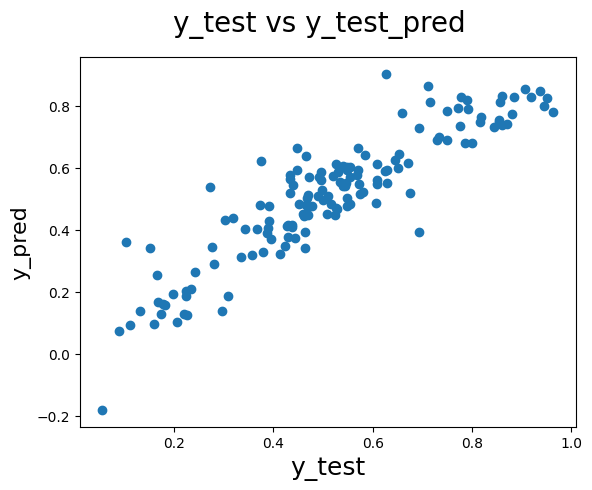

In [85]:
# Plotting actua; y_test against y_predicted test values to see the spread of variance
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)                  
plt.ylabel('y_pred', fontsize=16)
plt.show()

- While ideal case is that points should be aligned in a 45 degree line which indicate zero errors and 100% accuracy our plot shows a tight clustering of points around that hypothetical line. This suggests our predicated values are close to actual values on the test dataset too and have high accuracy

In [103]:
for k, v in list(dict(lm.params).items())[1:]:
    print(str(k) + ' x ' + str(np.round(v, 3)), end=' + ')
print(np.round(list(dict(lm.params).items())[0][1], 3))

atemp x 0.446 + hum x -0.16 + windspeed x -0.16 + season_spring x -0.089 + season_winter x 0.077 + yr_2019 x 0.231 + mnth_3 x 0.059 + mnth_4 x 0.057 + mnth_5 x 0.088 + mnth_6 x 0.071 + mnth_8 x 0.06 + mnth_9 x 0.119 + mnth_10 x 0.064 + holiday_Holiday_Yes x -0.088 + weathersit_Misty x -0.054 + weathersit_Snowfall x -0.248 + 0.311


So the equation for this line(our model) should be :

atemp x 0.446 + hum x -0.16 + windspeed x -0.16 + season_spring x -0.089 + season_winter x 0.077 + yr_2019 x 0.231 + mnth_3 x 0.059 + mnth_4 x 0.057 + mnth_5 x 0.088 + mnth_6 x 0.071 + mnth_8 x 0.06 + mnth_9 x 0.119 + mnth_10 x 0.064 + holiday_Holiday_Yes x -0.088 + weathersit_Misty x -0.054 + weathersit_Snowfall x -0.248 + 0.311